# **importing libraries and loading evaluated dataframe**

In [28]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [29]:
classified_df = pd.read_csv('evaluated_df.csv')

## **Analyzing Percentile Characteristics of each cluster**

In [30]:
cluster_groups = classified_df.groupby('Cluster')

# Find the min and max values for each cluster and feature
min_max_values = cluster_groups.agg({'average_monthly_spend': ['min', 'max'],
                                     'average_monthly_visit_frequency': ['min', 'max'],
                                     'average_monthly_basket_size': ['min', 'max']})
min_max_values

average_monthly_spend            \
                                      min       max   
Cluster                                               
High end - Frequent              0.671596  1.303072   
High end - Loyal                 0.671617  1.303072   
High end - Premium               1.934591  2.776545   
Low level                       -1.012376 -0.696669   
Medium level                    -0.591399  0.040078   

                    average_monthly_visit_frequency            \
                                                min       max   
Cluster                                                         
High end - Frequent                        2.197851  2.859750   
High end - Loyal                           0.401271  0.966721   
High end - Premium                         1.346840  1.723176   
Low level                                 -1.111639 -0.657766   
Medium level                              -0.544298  0.210266   

                    average_monthly_basket_size            
                                            min       max  
Cluster                                                    
High end - Frequent                    0.142170  0.557360  
High end - Loyal                       1.806258  2.221448  
High end - Premium                     0.974214  1.888631  
Low level                             -1.022691 -0.690705  
Medium level                          -0.357056 -0.191479

In [31]:
from scipy.stats import percentileofscore

# Function to calculate the percentile rank of a value within a cluster and feature
def calculate_percentile(value, feature_values):
    percentile = percentileofscore(feature_values, value)
    return percentile

# Iterate over each cluster and feature
for cluster, group in cluster_groups:
    print(f"Cluster {cluster}:")
    for feature in ['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']:
        min_value = min_max_values.loc[cluster, (feature, 'min')]
        max_value = min_max_values.loc[cluster, (feature, 'max')]
        
        feature_values = classified_df[feature].values
        
        min_percentile = calculate_percentile(min_value, feature_values)
        max_percentile = calculate_percentile(max_value, feature_values)
        
        print(f"Feature: {feature}")
        print(f"Minimum value ({min_value}) is at {min_percentile}th percentile")
        print(f"Maximum value ({max_value}) is at {max_percentile}th percentile")
    print()

Cluster High end - Frequent:
Feature: average_monthly_spend
Minimum value (0.6715961426155235) is at 71.44976031581916th percentile
Maximum value (1.303072477271551) is at 91.0717172666604th percentile
Feature: average_monthly_visit_frequency
Minimum value (2.197851461150343) is at 92.88626750634458th percentile
Maximum value (2.8597496308235137) is at 100.0th percentile
Feature: average_monthly_basket_size
Minimum value (0.142170499489766) is at 71.45718582573551th percentile
Maximum value (0.5573603981647348) is at 78.58407745088824th percentile

Cluster High end - Loyal:
Feature: average_monthly_spend
Minimum value (0.6716171925283424) is at 71.45023028480121th percentile
Maximum value (1.303072477271551) is at 91.0717172666604th percentile
Feature: average_monthly_visit_frequency
Minimum value (0.401270714894593) is at 71.46771313093336th percentile
Maximum value (0.9667208655582448) is at 83.91296174452486th percentile
Feature: average_monthly_basket_size
Minimum value (1.80625826

## **Visualizing percentile characteristics**

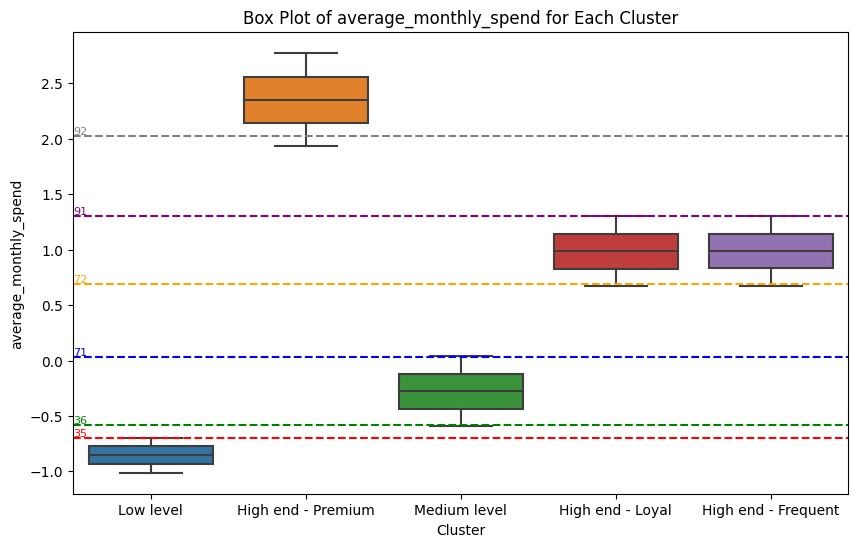

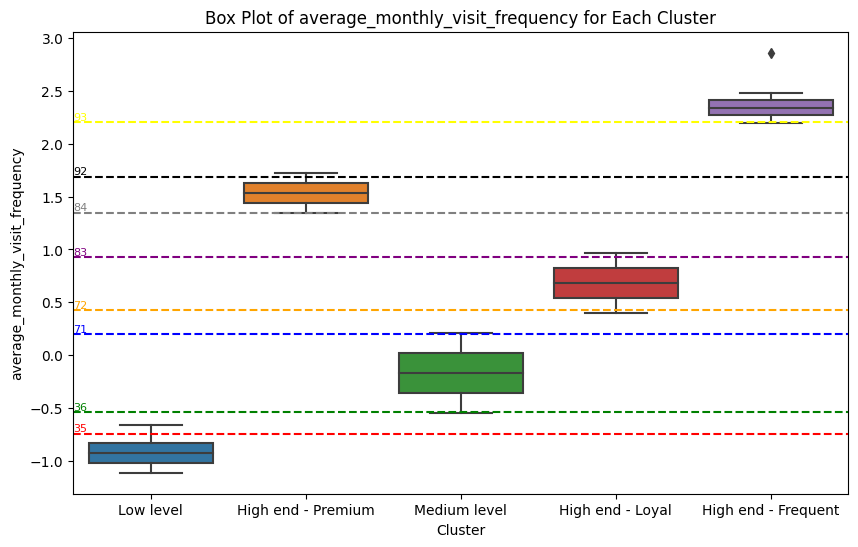

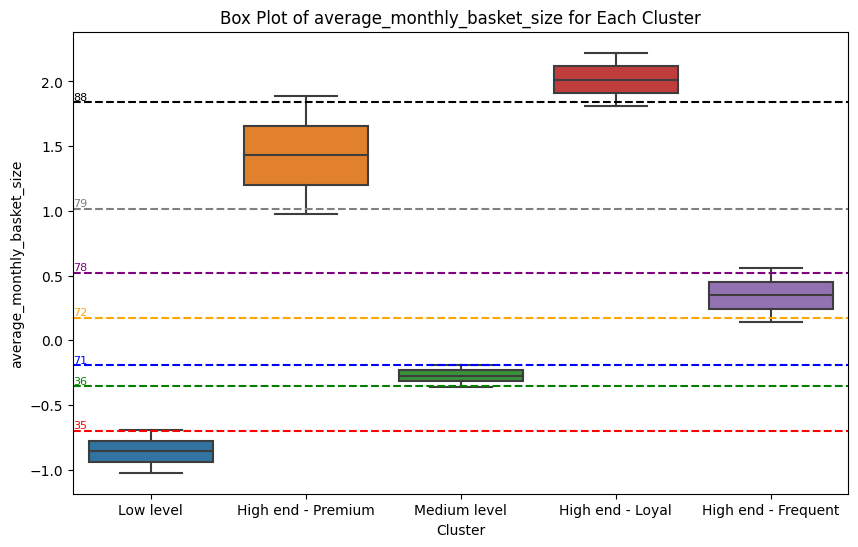

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the percentiles to mark
percentiles_to_mark = [[35,36,71,72,91,92],[35,36,71,72,83,84,92,93],[35,36,71,72,78,79,88]]

# Calculate the percentile values for each feature
percentiles = {}
j=0
for feature in classified_df.drop(columns=['Cluster']).columns:
    percentiles[feature] = np.percentile(classified_df[feature], percentiles_to_mark[j])
    j+=1

colors = ['red', 'green', 'blue', 'orange', 'purple','grey','black', 'yellow']
j=0
# Iterate over each feature and create box plots for each cluster
for feature in classified_df.drop(columns=['Cluster']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=classified_df)
    
    # Mark every 5th percentile region with a horizontal line
    i=0
    
    for p in percentiles_to_mark[j]:
        plt.axhline(y=percentiles[feature][i], color=colors[i], linestyle='--', label=f'{p}th percentile')
        plt.text(x=-0.5, y=percentiles[feature][i], s=f'{p}', color=colors[i], fontsize=8, va='bottom')
        i+=1
    
    plt.title(f'Box Plot of {feature} for Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()
    j+=1
    




**By analyzing the visualizations of the box plots given above, the percentile rules for each customer segment can be deduced to be as follows.**

Low level
- Monthly spend between 0-35th percentile
- Monthly visit frequency between 0-35th percentile.
- Monthly basket size - between 0-35th percentile

High end - Premium
- Monthly spend between 92-100th percentile
- Monthly visit frequency between 84-92nd percentile.
- Monthly basket size - between 79-88th percentile

Medium level
- Monthly spend between 36-71st percentile
- Monthly visit frequency between 36-71st percentile.
- Monthly basket size - between 36-71st percentile

High end - Loyal
- Monthly spend between 72-91st percentile
- Monthly visit frequency between 72-83th percentile.
- Monthly basket size - between 88-100th percentile

High end - Frequent
- Monthly spend between 72-91st percentile
- Monthly visit frequency between 93-100th percentile.
- Monthly basket size - between 72-78st percentile